# <span style = "color:green"> Spam Classifier with NLTK </spam>

***

The SMS spam collection dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5574 messages, tagged according being ham (legitimate) or spam.

### Content

The file contain one message per line. Each line is composed by two columns:
v1 contains the label (ham or spam) and v2 contains the raw text.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'spam.csv' dataset

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

### Check the head

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Drop all Unnamed columns

In [4]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Check info 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Rename v1 to Label and v2 to Messages

In [7]:
df.rename(columns = {'v1':'Label','v2':'Messages'}, inplace = True)

In [8]:
df.head()

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Print few of the messages

In [9]:
for i in range(10):
    print(df['Messages'][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R enti

### Check the unique values in label

In [10]:
df['Label'].unique()

array(['ham', 'spam'], dtype=object)

### Check for null values

In [11]:
df.isna().sum()

Label       0
Messages    0
dtype: int64

### Check for duplicates

In [12]:
df.duplicated().sum()

403

Looks like we have 403 duplicate values

### Drop duplicates

In [13]:
df.drop_duplicates(keep='first', inplace = True)

In [14]:
df.head()

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Confirm droped duplicates

In [15]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### Check the value counts in the dataset

In [16]:
df['Label'].value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

### Visualize the value count using pieplot

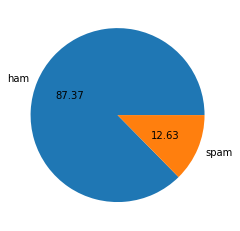

In [17]:
plt.pie(df['Label'].value_counts(), labels = ['ham','spam'], autopct='%0.2f')
plt.show()

The dataset seem to be slightly imbalanced

### Import WordNetLemmatizer, stopwords

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Create a function to clean the messages

In [19]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Apply the function to messages feature in our dataframe

In [20]:
df['Messages'] = df['Messages'].apply(preprocess)

In [21]:
df.head()

,Label,Messages
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joke wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah i think go usf live around though


### Print few of the sentences after preprocessing

In [22]:
for i in range(10):
    print(df['Messages'][i])

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate t c apply 08452810075over18
u dun say early hor u c already say
nah i think go usf live around though
freemsg hey darling 3 week word back i like fun still tb ok xxx std chgs send 1 50 rcv
even brother like speak they treat like aid patent
as per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune
winner as value network customer select receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours
have mobile 11 months u r entitle update latest colour mobiles camera free call the mobile update co free 08002986030


### Create Bag of Words model

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer()

### Fit transform messages feature in our dataframe

In [25]:
X = cv.fit_transform(df['Messages']).toarray()

### Check the shape of X

In [26]:
X.shape

(5169, 7620)

### Print X

In [27]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Create a function to change 'ham' to 1 and 'spam' to 0 in our label features

In [28]:
def hamspam(x):
    if x == 'ham':
        return 1
    else:
        return 0

### Apply the function to our label features in our dataframe and store it in y variable

In [29]:
y = df['Label'].apply(hamspam)

In [30]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Label, Length: 5169, dtype: int64

### Split the dataset into training and testing set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

### Create Random Forest model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier()

### Train the model

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier()

### Check the score of our training set

In [36]:
model.score(X_train, y_train)

1.0

### Make prediction with X_test

In [37]:
prediction = model.predict(X_test)

### Check the accuracy of our prediction

In [38]:
from sklearn import metrics

In [39]:
metrics.accuracy_score(y_test, prediction)

0.9787234042553191

### Visualize confusion matrix on a heatmap

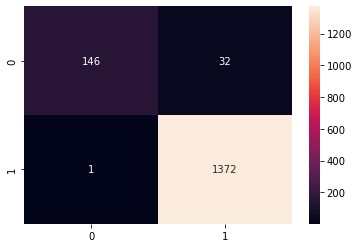

In [40]:
sns.heatmap(metrics.confusion_matrix(y_test,prediction),annot = True, fmt = 'd')
plt.show()

### Create classification report

In [41]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       178
           1       0.98      1.00      0.99      1373

    accuracy                           0.98      1551
   macro avg       0.99      0.91      0.94      1551
weighted avg       0.98      0.98      0.98      1551



***

# <center><a href = "http://edure.in/"><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></a></center>